In [87]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
%pylab inline
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr


Populating the interactive namespace from numpy and matplotlib


In [74]:
data=pd.read_csv("linear-reg-sample.csv") #load from the jupyter directory

In [75]:
data.head(3)

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262


In [76]:
data.isnull().sum()

x    0
y    0
dtype: int64

In [77]:
data.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
x    300 non-null int64
y    300 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [93]:
#check correlation between the two variables
print(pearsonr(data[['x']],data[['y']]))
# result is the correlation coefficient and associated p-value

(array([ 0.9945453]), array([  1.32551471e-294]))


In [91]:
# Preprocess the data to remove any points with a missing y value
filtered_data= data[~np.isnan(data['y'])] #removes rows with NAN in them
filtered_data=filtered_data.dropna()

In [110]:
# Fit a linear regression model using sklearn's LinearRegression package
npMatrix=np.matrix(filtered_data)
X,Y= npMatrix[:,0], npMatrix[:,1] #convert them into numpy array for modeling


In [115]:
print(X.shape)
print(Y.shape)

(300, 1)
(300, 1)


In [ ]:
model_1=LinearRegression().fit(X,Y) #fitting the model means training the model

In [111]:
y_pred = model_1.predict(npMatrix[:,0]) #predictions

In [112]:
model_1.score(X,Y)

0.98912036114027158

In [114]:
#alternate way of getting explained variance
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(Y,y_pred)) 
print(mean_squared_error(Y,y_pred))

0.98912036114
9.16428786061


In [103]:
m = model.coef_ #array of all the possible coefficients
b = model.intercept_


In [104]:
#y=mx + b
print ("formula: y = {0}x + {1}".format(m, b)) # following slope intercept form

formula: y = [[ 1.01433536]]x + [-0.46181077]


In [84]:
X=np.array(X)
Y=np.array(Y)

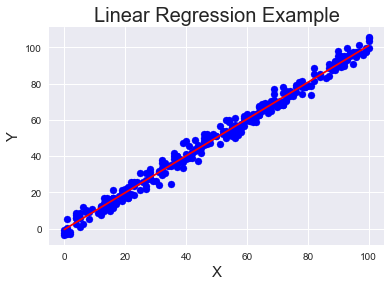

In [85]:
plt.scatter(X,Y, color='blue')
plt.plot([0,100],[b,m*100+b],'r') #plot 'red' coloured regression line
plt.title('Linear Regression Example', fontsize = 20)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.show()


In [108]:
import statsmodels.api as sm

# Note the difference in argument order
model = sm.OLS(Y, X).fit() #ordinary least square regression
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.121e+05
Date:                Sat, 27 Jan 2018   Prob (F-statistic):               0.00
Time:                        14:44:40   Log-Likelihood:                -758.81
No. Observations:                 300   AIC:                             1520.
Df Residuals:                     299   BIC:                             1523.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0074      0.003    334.824      0.000       1.002       1.013
==============================================================================
Omnibus:                        0.871   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.647   Jarque-Bera (JB):                0.658
Skew:                           0.100   Prob(JB):                        0.720
Kurtosis:                       3.113   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
help('modules')


Please wait a moment while I gather a list of all available modules...



C:\Users\Gautam\Anaconda3\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
C:\Users\Gautam\Anaconda3\lib\site-packages\odo\backends\pandas.py:94: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access NaTType as type(pandas.NaT)
  @convert.register((pd.Timestamp, pd.Timedelta), (pd.tslib.NaTType, type(None)))
C:\Users\Gautam\Anaconda3\lib\site-packages\blaze\server\server.py:17: ExtDeprecationWarning: Importing flask.ext.cors is deprecated, use flask_cors instead.
  from flask.ext.cors import cross_origin
C:\Users\Gautam\Anaconda3\lib\site-packages\bokeh\util\deprecation.py:34: BokehDeprecationWarning: MPL compatibility can no longer be successfully maintained, and is now deprecated. All MPL compat functions will be removed compl

Crypto              chardet             msgpack             sqlalchemy
Cython              chunk               msilib              sqlite3
IPython             click               msvcrt              sre_compile
OleFileIO_PL        cloudpickle         multipledispatch    sre_constants
OpenSSL             clyent              multiprocessing     sre_parse
PIL                 cmath               navigator_updater   ssl
PyQt5               cmd                 nbconvert           sspi
__future__          code                nbformat            sspicon
_ast                codecs              netbios             stat
_asyncio            codeop              netrc               statistics
_bisect             collections         networkx            statsmodels
_blake2             colorama            nltk                storemagic
_bootlocale         colorsys            nntplib             string
_bz2                commctrl            nose                stringprep
_cffi_backend       compileall 